## Data Visualization

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import tree, preprocessing
import numpy as np

url = 'https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv'
penguins = pd.read_csv(url)

In [2]:
penguins.columns

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'],
      dtype='object')

In [3]:
penguins.dropna(subset = ["Delta 15 N (o/oo)"])

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
5,PAL0708,6,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A2,Yes,11/16/07,39.3,20.6,190.0,3650.0,MALE,8.66496,-25.29805,NaN
6,PAL0708,7,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N4A1,No,11/15/07,38.9,17.8,181.0,3625.0,FEMALE,9.18718,-25.21799,Nest never observed with full clutch.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,PAL0910,119,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A1,No,12/1/09,47.2,13.7,214.0,4925.0,FEMALE,7.99184,-26.20538,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


In [4]:
penguins

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


In [7]:
penguins = penguins[["Species", "Culmen Length (mm)", "Flipper Length (mm)", "Body Mass (g)", "Sex"]]

In [8]:
penguins

,Species,Culmen Length (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin (Pygoscelis adeliae),39.1,181.0,3750.0,MALE
1,Adelie Penguin (Pygoscelis adeliae),39.5,186.0,3800.0,FEMALE
2,Adelie Penguin (Pygoscelis adeliae),40.3,195.0,3250.0,FEMALE
3,Adelie Penguin (Pygoscelis adeliae),NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),36.7,193.0,3450.0,FEMALE
...,...,...,...,...,...
339,Gentoo penguin (Pygoscelis papua),NaN,NaN,NaN,NaN
340,Gentoo penguin (Pygoscelis papua),46.8,215.0,4850.0,FEMALE
341,Gentoo penguin (Pygoscelis papua),50.4,222.0,5750.0,MALE
342,Gentoo penguin (Pygoscelis papua),45.2,212.0,5200.0,FEMALE


In [9]:
penguins = penguins.dropna()

In [10]:
penguins

,Species,Culmen Length (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin (Pygoscelis adeliae),39.1,181.0,3750.0,MALE
1,Adelie Penguin (Pygoscelis adeliae),39.5,186.0,3800.0,FEMALE
2,Adelie Penguin (Pygoscelis adeliae),40.3,195.0,3250.0,FEMALE
4,Adelie Penguin (Pygoscelis adeliae),36.7,193.0,3450.0,FEMALE
5,Adelie Penguin (Pygoscelis adeliae),39.3,190.0,3650.0,MALE
...,...,...,...,...,...
338,Gentoo penguin (Pygoscelis papua),47.2,214.0,4925.0,FEMALE
340,Gentoo penguin (Pygoscelis papua),46.8,215.0,4850.0,FEMALE
341,Gentoo penguin (Pygoscelis papua),50.4,222.0,5750.0,MALE
342,Gentoo penguin (Pygoscelis papua),45.2,212.0,5200.0,FEMALE


In [18]:
def scatterplot_matrix(cols, figsize):
    """
    This function uses a for loop to create an axes of scatterplots for the 
    relationship between each column and row but only prints the bottom half 
    of the matrix. 
    Args:
        cols: the number of columns in the dataset
        figsize: the figure size of each axes
    Returns:
        bottom half of the scatterplot matrix
    """
    # plotting multiple axes based on the number of columns in the dataset and the figsize 
    # is made equal to whatever the user inputs
    n = len(cols)   
    fig, ax = plt.subplots(n, n, figsize=figsize)
    
    # for column name in whatever the length/number of the shape of an array (row).
    for i in range(np.shape(ax)[0]):
        # for another column name in whatever the length/number of the shape of an array (column).
        for j in range(np.shape(ax)[1]):
            # setting axes labels respect to their column names
            ax[i,j].set(title = cols[i], ylabel = cols[j])
            # if the column names are different
            if i != j:
                # plot a scatter graph against each other
                ax[i,j].scatter(penguins[cols[i]], penguins[cols[j]])

    # Adjust the padding between and around subplots and print plot         
    plt.tight_layout()
    plt.show()

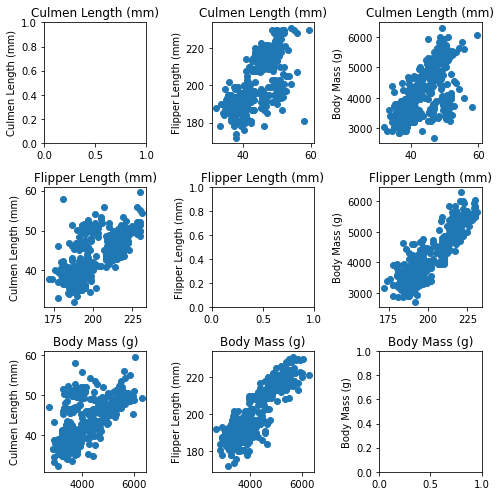

In [19]:
cols = ["Culmen Length (mm)", "Flipper Length (mm)", "Body Mass (g)"]
scatterplot_matrix(cols,figsize = (7,7))